### Module 5 Assignment

Problem 1

In [2]:
import scipy.stats as sp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# creating necessary objects
def inverse_transform(func_invcdf,nobs,*args,**kwargs):
    # function to do the inverse transform method
    # args and kwargs are variable inputs we can use for the input function should it be needed
    # nobs is the number of draws
    
    # generate uniform random numbers
    rand_numbers = sp.uniform.rvs(size=nobs)
    # return the inverse cdf applied on the random numbers
    return func_invcdf(rand_numbers,*args,**kwargs)

def accept_reject(f_pdf,g_pdf,g_gen,M=1,ndraws=100,*args,**kwargs):
    # function to do the accept reject method
    # f_pdf is desired pdf to sample from
    # g_pdf is the candidate pdf function
    # g_geg is the function to generate a candidate value from distribution g_gen - we may have to use exotic densities
    # M is the scalar such that M>=sup(f(x)/g(x)) for all x
    
    sim_values = np.zeros(ndraws,)
    sim_success = 0 # python index starts at 0
    sim_idx = -1
    n_count=0
    
    while sim_success < ndraws:
        # draw a random value from g_gen
        cand_rv = g_gen(*args,**kwargs)
        # draw uniform random value bounded between 0 and M*cand_rand
        unif_rv = sp.uniform.rvs(loc=0,scale=g_pdf(cand_rv)*M,size=1,)
        
        if unif_rv < f_pdf(cand_rv,):
            sim_success +=1
            sim_idx +=1
            sim_values[sim_idx]=cand_rv
    return sim_values



##### Problem 1

In [5]:
# define the inverse cdf function for problem 1 here
def inv_laplace(x,theta,llambda,):
    results = theta -(1./llambda)*np.sign(x-0.5)*np.log(1-2*np.abs(x-0.5))
    return results


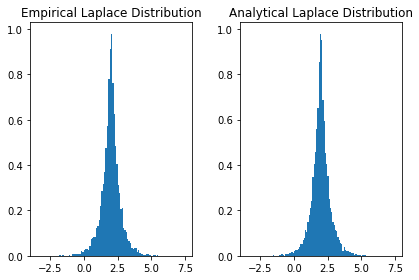

In [7]:
empirical = inverse_transform(inv_laplace,10000,theta=2,llambda=2)
analytical = sp.laplace.rvs(loc=2,scale=1/2,size=10000)

ax_ = plt.subplot(1,2,1)
ax_.hist(empirical,bins=100,density=True);
ax_.set_title('Empirical Laplace Distribution')
ax_.set_xlim(-4,8)

ax_ = plt.subplot(1,2,2)
ax_.hist(analytical,bins=100,density=True);
ax_.set_title('Analytical Laplace Distribution')
ax_.set_xlim(-4,8)


plt.tight_layout()
plt.show()

##### Problem 2

In [9]:
def f_p2_pdf(x,*args,**kwargs):
    if x>0 and x<1:
        return 0.25
    elif x>=1 and x<=2:
        return x-(3/4)
    else:
        pass

def f_p2_invcdf(u_val,*args,**kwargs):
    x_val = np.zeros(len(u_val))
    for iu,u_ in enumerate(u_val):
        if u_ >0 and u_ <0.25:
            x_val[iu]=4*u_
        elif u_ >=0.25 and u_<=1:
            x_val[iu]= np.sqrt(2*(u_-0.25)+1/16)+(3/4)
    return x_val

    
def g_p2_pdf(x,*args,**kwargs):
    return 0.5

def g_p2_gen(n=1,*args,**kwargs):
    return sp.uniform.rvs(loc=0,scale=2,size=n)





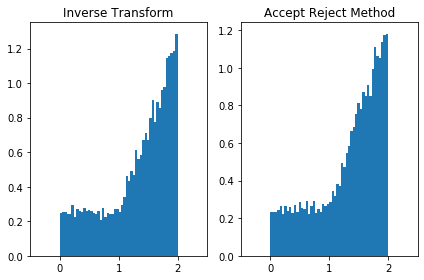

In [10]:
# generate the empirical distributions
emp_inv_trans = inverse_transform(f_p2_invcdf,10000,)
emp_acc_rej = accept_reject(f_p2_pdf,g_p2_pdf,g_p2_gen,M=3,ndraws=10000)

ax_ = plt.subplot(1,2,1)
ax_.hist(emp_inv_trans,bins=50,density=True);
ax_.set_title('Inverse Transform')
ax_.set_xlim(-0.5,2.5)

ax_ = plt.subplot(1,2,2)
ax_.hist(emp_acc_rej,bins=50,density=True);
ax_.set_title('Accept Reject Method')
ax_.set_xlim(-0.5,2.5)


plt.tight_layout()
plt.show()
        

##### Problem 3

In [19]:
# pdf we want to draw from
def f_p3_pdf(x,*args,**kwargs):
    if x>0 and x<1:
        return 0.5*x
    elif x>=1 and x<=5/2:
        return 0.5
    else:
        pass

# inverse cdf F^-1
def f_p3_invcdf(u_val,*args,**kwargs):
    x_val = np.zeros(len(u_val))
    for iu,u_ in enumerate(u_val):
        if u_ >0 and u_ <0.25:
            x_val[iu]=2*np.sqrt(u_)
        elif u_ >=0.25 and u_<=1:
            x_val[iu]= 2*(u_-0.25)+1
    return x_val

# candidate pdf
def g_p3_pdf(x,*args,**kwargs):
    if x>=0 and x<=5/2:
        return x*8/25
    else:
        pass

# generate from candidate pdf - this uses the inverse cdf method for g(x)
def g_p3_gen(n=1,*args,**kwargs):
    u_rv = sp.uniform.rvs(loc=0,scale=1,size=n)
    return 5/2*np.sqrt(u_rv)
    
    



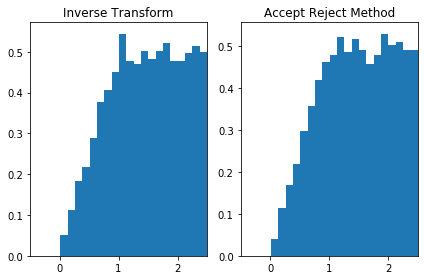

In [46]:
# generate the empirical distributions
emp_inv_trans = inverse_transform(f_p3_invcdf,10000,)
emp_acc_rej = accept_reject(f_p3_pdf,g_p3_pdf,g_p3_gen,M=4,ndraws=10000)

ax_ = plt.subplot(1,2,1)
ax_.hist(emp_inv_trans,bins=20,density=True);
ax_.set_title('Inverse Transform')
ax_.set_xlim(-0.5,2.5)

ax_ = plt.subplot(1,2,2)
ax_.hist(emp_acc_rej,bins=20,density=True);
ax_.set_title('Accept Reject Method')
ax_.set_xlim(-0.5,2.5)


plt.tight_layout()
plt.show()


##### Problem 4

In [4]:
# inverse cdf F^-1
def f_p4_invcdf(u_val,n=10,*args,**kwargs):
    # setting the initial probabilities
    prob = 1/(n+1)
    prob_vec = np.ones(n+1)*prob
    prob_cum = prob_vec.cumsum()
    prob_idx = np.ones(n+1)
    
    x_val = np.zeros(len(u_val))
    # iterate through u_val
    for iu,u_ in enumerate(u_val):
        x_val[iu] = int(prob_idx[prob_cum<=u_].sum())
    return x_val

<BarContainer object of 11 artists>

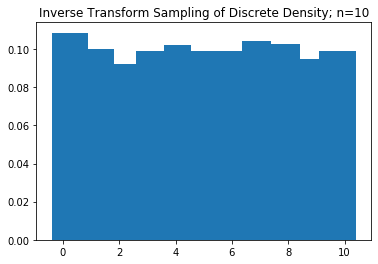

In [5]:
# using n=N=10
N=10
emp_inv_trans = inverse_transform(f_p4_invcdf,10000,n=N)
hist_data = plt.hist(emp_inv_trans,bins=N+1,density=True);
# plot a bar plot here since the hist doesn't look great by default


<BarContainer object of 11 artists>

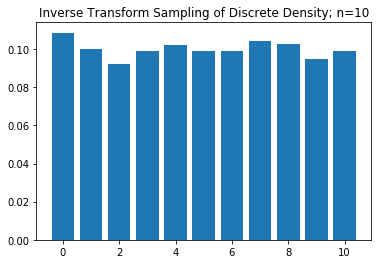

In [6]:
ax_ = plt.gca()
ax_.set_title('Inverse Transform Sampling of Discrete Density; n=10')
plt.bar(x=np.arange(len(hist_data[0])),height=hist_data[0])


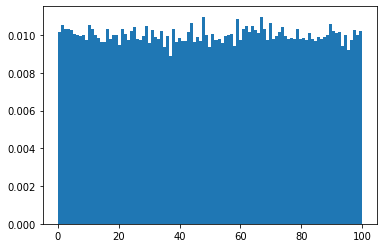

In [10]:
N=100
emp_inv_trans = inverse_transform(f_p4_invcdf,100000,n=N)
hist_data = plt.hist(emp_inv_trans,bins=N+1,density=True);


<BarContainer object of 101 artists>

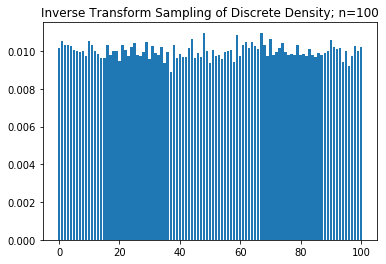

In [11]:
ax_ = plt.gca()
ax_.set_title('Inverse Transform Sampling of Discrete Density; n=100')
plt.bar(x=np.arange(len(hist_data[0])),height=hist_data[0])
